<a href="https://colab.research.google.com/github/SuYouge/colab/blob/master/uncertainty_ellipse.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
%matplotlib inline


# Plot a confidence ellipse of a two-dimensional dataset


This example shows how to plot a confidence ellipse of a
two-dimensional dataset, using its pearson correlation coefficient.



The approach that is used to obtain the correct geometry is
explained and proved here:



https://carstenschelp.github.io/2018/09/14/Plot_Confidence_Ellipse_001.html

The method avoids the use of an iterative eigen decomposition algorithm
and makes use of the fact that a normalized covariance matrix (composed of
pearson correlation coefficients and ones) is particularly easy to handle.


  这个例子展示了如何利用它的`pearson correlation coefficient`绘制一个二维数据的置信(不确定性)椭圆。

绘制的正确性证明在下面的文章中。

https://carstenschelp.github.io/2018/09/14/Plot_Confidence_Ellipse_001.html

这个方法避免了利用迭代特征值分解算法，利用了归一化协方差矩阵（由皮尔森相关系数和单位阵确定）容易处理的特点。

In [0]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.patches import Ellipse
import matplotlib.transforms as transforms

## The plotting function itself

This function plots the confidence ellipse of the covariance of the given
array-like variables x and y. The ellipse is plotted into the given
axes-object ax.

The radiuses of the ellipse can be controlled by n_std which is the number
of standard deviations. The default value is 3 which makes the ellipse
enclose 99.7% of the points (given the data is normally distributed
like in these examples).


这个函数的功能是绘制给定向量x和y的协方差置信椭圆。图像绘制在给定的axes-object ax上。
椭圆的半径由标准差数目`n_std`确定。默认值为3，即99.7%的点会在椭圆之内（假设数据是正态分布的）。  
其中`Pearson Correlation Coefficient`为两个变量的相关系数，公式为协方差除以两个标准差的乘积。

In [0]:
def confidence_ellipse(x, y, ax, n_std=3.0, facecolor='none', **kwargs):
    """
    Create a plot of the covariance confidence ellipse of *x* and *y*.

    Parameters
    ----------
    x, y : array-like, shape (n, )
        Input data.

    ax : matplotlib.axes.Axes
        The axes object to draw the ellipse into.

    n_std : float
        The number of standard deviations to determine the ellipse's radiuses.

    **kwargs
        Forwarded to `~matplotlib.patches.Ellipse`

    Returns
    -------
    matplotlib.patches.Ellipse
    """
    if x.size != y.size:
        raise ValueError("x and y must be the same size")

    cov = np.cov(x, y) # 计算两个输入向量的协方差矩阵
    pearson = cov[0, 1]/np.sqrt(cov[0, 0] * cov[1, 1]) # 计算皮尔森相关系数
    # Using a special case to obtain the eigenvalues of this
    # two-dimensionl dataset.
    ell_radius_x = np.sqrt(1 + pearson) # 计算椭圆的两个轴
    ell_radius_y = np.sqrt(1 - pearson)
    # 利用matplotlib构造椭圆
    ellipse = Ellipse((0, 0), width=ell_radius_x * 2, height=ell_radius_y * 2,
                      facecolor=facecolor, **kwargs)

    # Calculating the stdandard deviation of x from
    # the squareroot of the variance and multiplying
    # with the given number of standard deviations.
    # 计算x的标准差并按n_std扩大
    scale_x = np.sqrt(cov[0, 0]) * n_std
    mean_x = np.mean(x)

    # calculating the stdandard deviation of y ...
    # 对y进行同样的计算
    scale_y = np.sqrt(cov[1, 1]) * n_std
    mean_y = np.mean(y)

    # 构造变换
    transf = transforms.Affine2D() \
        .rotate_deg(45) \
        .scale(scale_x, scale_y) \
        .translate(mean_x, mean_y)

    ellipse.set_transform(transf + ax.transData)
    return ax.add_patch(ellipse)

## A helper function to create a correlated dataset


Creates a random two-dimesional dataset with the specified
two-dimensional mean (mu) and dimensions (scale).
The correlation can be controlled by the param 'dependency',
a 2x2 matrix.



根据给定的均值和维度，构造随机二维数据，相关性由dependency这个2x2的矩阵控制。

In [0]:
def get_correlated_dataset(n, dependency, mu, scale):
    latent = np.random.randn(n, 2)
    dependent = latent.dot(dependency)
    scaled = dependent * scale
    scaled_with_offset = scaled + mu
    # return x and y of the new, correlated dataset
    return scaled_with_offset[:, 0], scaled_with_offset[:, 1]

## Positive, negative and weak correlation

Note that the shape for the weak correlation (right) is an ellipse,
not a circle because x and y are differently scaled.
However, the fact that x and y are uncorrelated is shown by
the axes of the ellipse being aligned with the x- and y-axis
of the coordinate system.



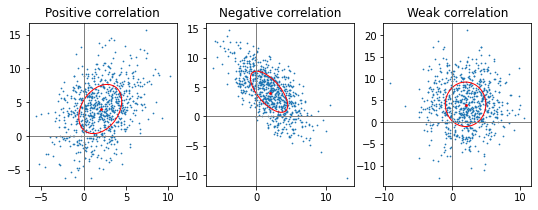

In [9]:
np.random.seed(0)

PARAMETERS = {
    'Positive correlation': [[0.85, 0.35],
                             [0.15, -0.65]],
    'Negative correlation': [[0.9, -0.4],
                             [0.1, -0.6]],
    'Weak correlation': [[1, 0],
                         [0, 1]],
}

mu = 2, 4
scale = 3, 5

fig, axs = plt.subplots(1, 3, figsize=(9, 3))
for ax, (title, dependency) in zip(axs, PARAMETERS.items()):
    x, y = get_correlated_dataset(800, dependency, mu, scale)
    ax.scatter(x, y, s=0.5)

    ax.axvline(c='grey', lw=1)
    ax.axhline(c='grey', lw=1)

    confidence_ellipse(x, y, ax,n_std=1.0,edgecolor='red')

    ax.scatter(mu[0], mu[1], c='red', s=3)
    ax.set_title(title)

plt.show()

## Different number of standard deviations

A plot with n_std = 3 (blue), 2 (purple) and 1 (red)  
绘制不同标准差数目下的情况，蓝色3个，紫色2个，红色1个


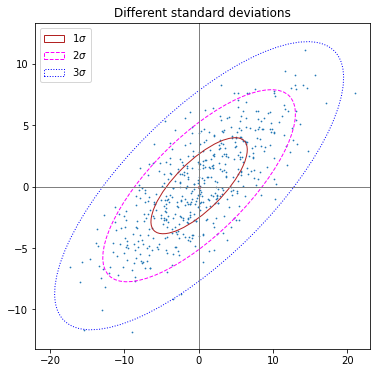

In [6]:
fig, ax_nstd = plt.subplots(figsize=(6, 6))

dependency_nstd = [[0.8, 0.75],
                   [-0.2, 0.35]]
mu = 0, 0
scale = 8, 5

ax_nstd.axvline(c='grey', lw=1)
ax_nstd.axhline(c='grey', lw=1)

x, y = get_correlated_dataset(500, dependency_nstd, mu, scale)
ax_nstd.scatter(x, y, s=0.5)

confidence_ellipse(x, y, ax_nstd, n_std=1,
                   label=r'$1\sigma$', edgecolor='firebrick')
confidence_ellipse(x, y, ax_nstd, n_std=2,
                   label=r'$2\sigma$', edgecolor='fuchsia', linestyle='--')
confidence_ellipse(x, y, ax_nstd, n_std=3,
                   label=r'$3\sigma$', edgecolor='blue', linestyle=':')

ax_nstd.scatter(mu[0], mu[1], c='red', s=3)
ax_nstd.set_title('Different standard deviations')
ax_nstd.legend()
plt.show()

##　Using the keyword arguments

Use the kwargs specified for matplotlib.patches.Patch in order
to have the ellipse rendered in different ways.　　

利用kwargs（keyword arguments）来用不同的方式绘制椭圆。

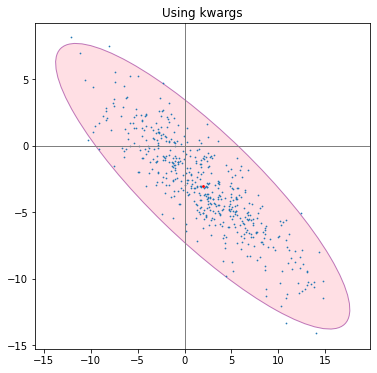

In [7]:
fig, ax_kwargs = plt.subplots(figsize=(6, 6))
dependency_kwargs = [[-0.8, 0.5],
                     [-0.2, 0.5]]
mu = 2, -3
scale = 6, 5

ax_kwargs.axvline(c='grey', lw=1)
ax_kwargs.axhline(c='grey', lw=1)

x, y = get_correlated_dataset(500, dependency_kwargs, mu, scale)
# Plot the ellipse with zorder=0 in order to demonstrate
# its transparency (caused by the use of alpha).
confidence_ellipse(x, y, ax_kwargs,
                   alpha=0.5, facecolor='pink', edgecolor='purple', zorder=0)

ax_kwargs.scatter(x, y, s=0.5)
ax_kwargs.scatter(mu[0], mu[1], c='red', s=3)
ax_kwargs.set_title(f'Using kwargs')

fig.subplots_adjust(hspace=0.25)
plt.show()